# Introduction to transfer learning

### Content:
* Building and training small CNN from scratch
* Transfer learning in CNN
* Visualization of CNN
* Fast training trick

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn import metrics
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

from utils import *

In [2]:
# Set seed for reproducible results
tf.keras.utils.set_random_seed(0)

## Build & train your first CNN from scratch

In [3]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = load_data()

images = x_test.copy()

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


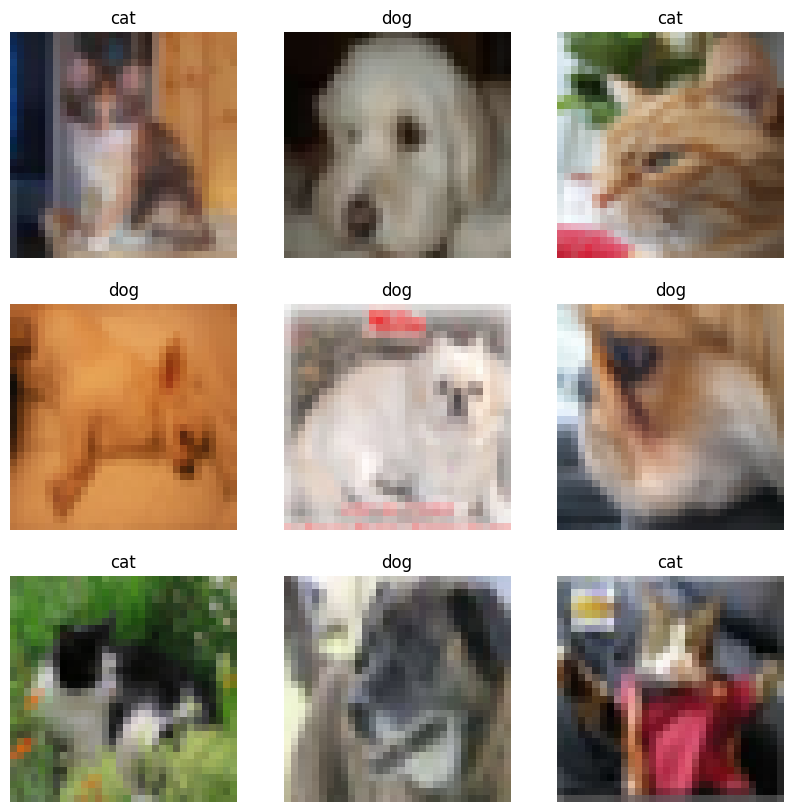

In [4]:
# Visualize a few random images
indices = np.random.randint(0, len(y_train), size=9)
plot_images(x_train[indices, ...], y_train[indices, :])

In [5]:
# Build a model with 2 conv layers, 2 max pooling layers and one decision neuron at the end
# NOTE: Rescaling of pixels eases the learning process
model = keras.Sequential(
    [
        keras.Input(shape=x_train.shape[1:]),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,697 (84.75 KB)

 Trainable params: 21,697 (84.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
batch_size = 64

$$
\text{Binary Crossentropy} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

In [7]:
# Compile and fit the model with ModelCheckpoint callback which saves the best
# model (in terms of validation loss) on a disk
checkpointer = ModelCheckpoint(filepath='base_model-weights.keras',   # old Keras used 'base_model-weights.hdf5'
                               verbose=1, 
                               save_best_only=True)
# Adam (Adaptive Moment Estimation)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=50, callbacks=[checkpointer], validation_split=0.1)


Epoch 1/50
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5408 - loss: 0.6839
Epoch 1: val_loss improved from inf to 0.64713, saving model to base_model-weights.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5413 - loss: 0.6837 - val_accuracy: 0.6550 - val_loss: 0.6471
Epoch 2/50
137/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6454 - loss: 0.6302
Epoch 2: val_loss improved from 0.64713 to 0.60244, saving model to base_model-weights.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6458 - loss: 0.6299 - val_accuracy: 0.6890 - val_loss: 0.6024
Epoch 3/50
137/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6854 - loss: 0.5880
Epoch 3: val_loss improved from 0.60244 to 0.58364, saving model to base_model-weights.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6855 - loss: 0.5878 - val_accuracy: 0.6820 - val_loss: 0.5836
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7008 - loss: 0.5626
Epoch 4: val_loss improved fr

In [8]:
# Evaluate model with current weights
score = model.evaluate(x_test, y_test, verbose=0)
y1 = model.predict(x_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test loss: 0.748756468296051
Test accuracy: 0.7450000047683716


In [9]:
# Evaluate model with best weights from training
model.load_weights('base_model-weights.keras')
score = model.evaluate(x_test, y_test, verbose=0)
y2 = model.predict(x_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test loss: 0.5046335458755493
Test accuracy: 0.762499988079071


In [10]:
# TODO: Discuss both models and their performance (predictions, losses, ...)
# * loaded weights slightly improve accuracy
# * loaded weights significantly improve certainty of the model (higher probability of correct class)
y1_class = (y1 > 0.5).astype("uint8")
y2_class = (y2 > 0.5).astype("uint8")
cohen_kappa = metrics.cohen_kappa_score(y1_class, y2_class)
print("Agreement of both models:", cohen_kappa)

Agreement of both models: 0.6809284094231818


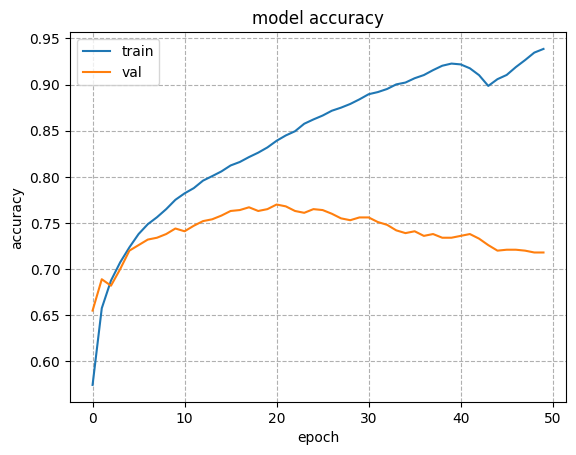

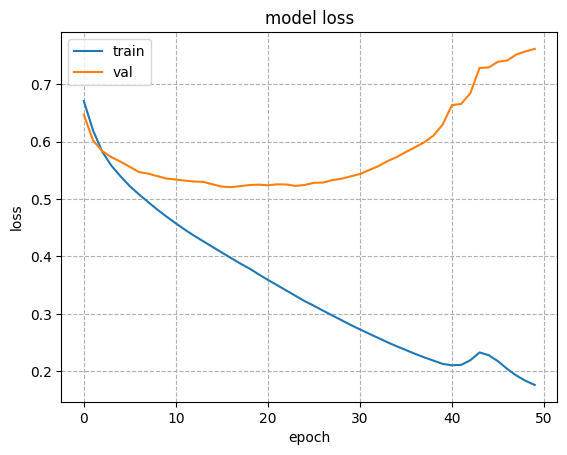

In [11]:
# TODO: Visualize training and discuss the phenomenon
plot_accuracy(history)
plot_loss(history)

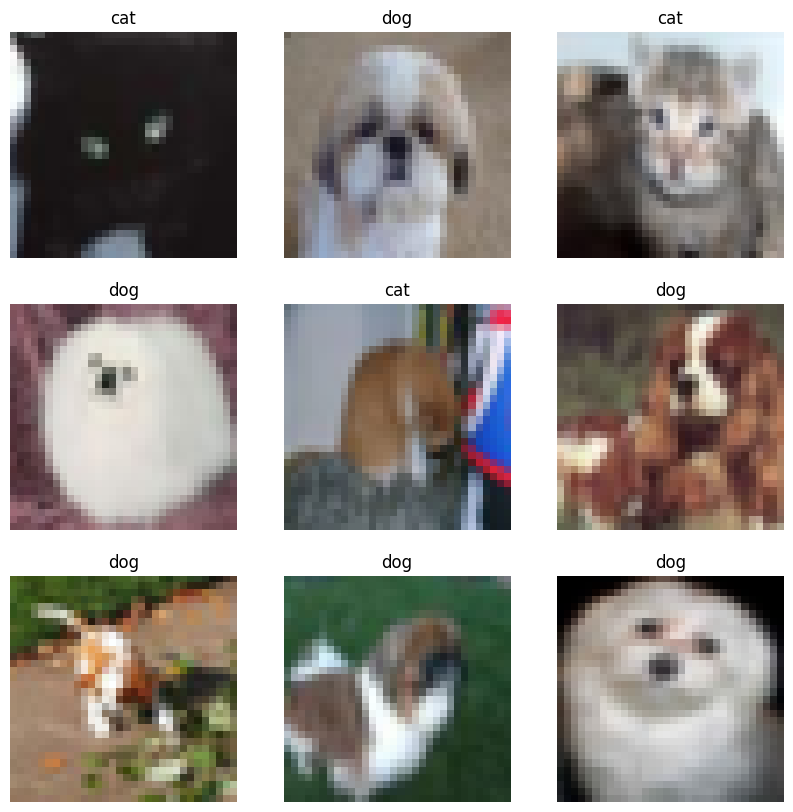

In [12]:
# Plot a few random images with true label
indices = np.random.randint(0, len(y_test), size=9)
plot_images(x_test[indices, ...], y_test[indices, :])

In [13]:
# TODO: Find optimal threshold for classification
# * discuss possible metrics (Cross entropy, what to use in case of imbalance data set? -> F1 Score, ...)
y_proba = model.predict(x_train)

scores = []
for i in np.linspace(0, 1, num=20):
    y_class = (y_proba > i).astype("uint8")
    scores.append((i, metrics.accuracy_score(y_train, y_class)))
    
threshold, score = max(scores, key=lambda x: x[1])
print("Optimal threshold", threshold, "achieved on training data set accuracy:", score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Optimal threshold 0.5263157894736842 achieved on training data set accuracy: 0.8269


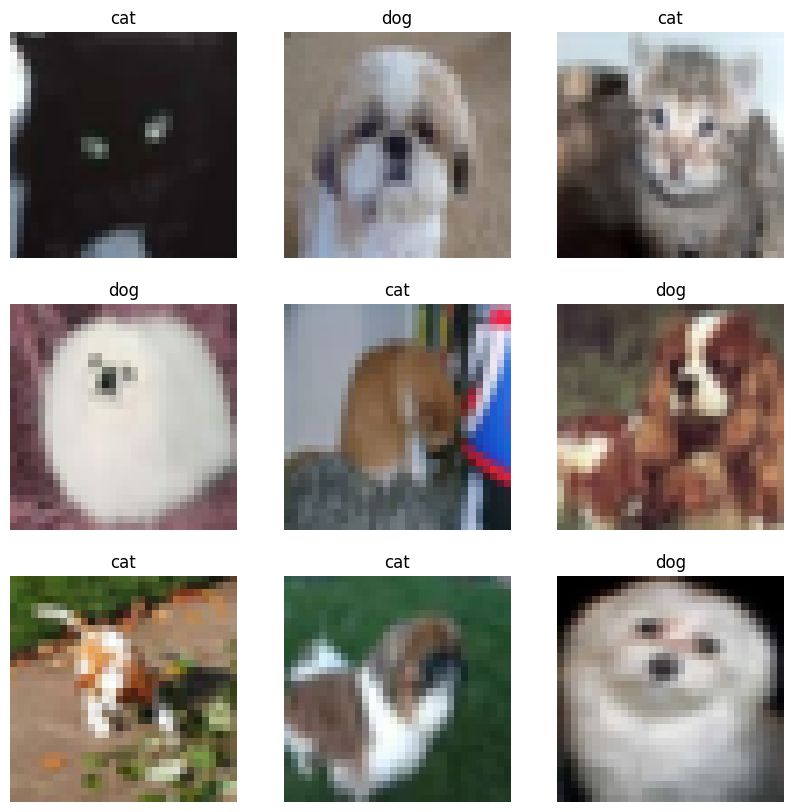

In [14]:
y_proba = model.predict(x_test, verbose=0)
y_pred = (y_proba > threshold).astype("uint8")
plot_images(x_test[indices, ...], y_pred[indices, :])

## Transfer learning

In [15]:
# References:
# https://keras.io/examples/vision/keypoint_detection/
# https://keras.io/guides/transfer_learning/
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
# https://cs231n.github.io/

In [16]:
# Load pretrained model
densenet = keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=layers.Input(shape=x_train.shape[1:])
)

In [17]:
# TRICK: Apply the same reprocessing techniques on input images as during training on ImageNet data set
x_train = keras.applications.densenet.preprocess_input(x_train)
x_test = keras.applications.densenet.preprocess_input(x_test)

In [18]:
# Use pretrained DenseNet as classifier
densenet.trainable = False # freeze all trained weights

flatten_output = layers.Flatten()(densenet.layers[-1].output)
last_layer = layers.Dense(1, 'sigmoid', name='predictions')(flatten_output)
model = keras.Model(inputs=densenet.input, outputs=last_layer)

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 38, 38, 3)         │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 16, 16, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 16, 16, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 16, 16, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 18, 18, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 8, 8, 64)          │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 8, 8, 64)          │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 8, 8, 128)         │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 8, 8, 128)         │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 8, 8, 128)         │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 8, 8, 32)          │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 8, 8, 96)          │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 4, 4, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 4, 4, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 2, 2, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 2, 2, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 2, 2, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 2, 2, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 2, 2, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 2, 2, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 2, 2, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 2, 2, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 2, 2, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 2, 2, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 2, 2, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 2, 2, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [20]:
print("weights:", len(model.weights))
print("trainable_weights:", len(model.trainable_weights))
print("non_trainable_weights:", len(model.non_trainable_weights))

weights: 606
trainable_weights: 2
non_trainable_weights: 604


In [21]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_split=0.1)

Epoch 1/6


C:\Users\francji1\OneDrive\gpu_test\venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_8']. Received: the structure of inputs=*
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.5738 - loss: 0.8787 - val_accuracy: 0.7140 - val_loss: 0.5931
Epoch 2/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7394 - loss: 0.5395 - val_accuracy: 0.7220 - val_loss: 0.5622
Epoch 3/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7594 - loss: 0.5048 - val_accuracy: 0.7320 - val_loss: 0.5472
Epoch 4/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7673 - loss: 0.4873 - val_accuracy: 0.7350 - val_loss: 0.5384
Epoch 5/6
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7717 - loss: 0.4764

In [ ]:
# TODO: Report your loss and accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Use pretrained DenseNet as feature generator
densenet.trainable = False # freeze all trained weights

flatten_output = layers.Flatten()(densenet.layers[-1].output)
second_layer_output = layers.Dense(8, 'relu', name='1_dense')(flatten_output)
last_layer = layers.Dense(1, 'sigmoid', name='predictions')(second_layer_output)
model = keras.Model(inputs=densenet.input, outputs=last_layer)

In [ ]:
model.summary()

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 4, 4, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 4, 4, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 2, 2, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 2, 2, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 2, 2, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 2, 2, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 2, 2, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 2, 2, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 2, 2, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 2, 2, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 2, 2, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 2, 2, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 2, 2, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 2, 2, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [ ]:
print("weights:", len(model.weights))
print("trainable_weights:", len(model.trainable_weights))
print("non_trainable_weights:", len(model.non_trainable_weights))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
keras.utils.plot_model(densenet, show_shapes=True, show_layer_names=True)

In [ ]:
# TRICK: Get pretrained weights
weights = model.get_weights()

In [ ]:
# TODO: Unfreeze only a few layers at the end of DenseNet
densenet.trainable = True # allow the model to be trained
for layer in densenet.layers: # freeze each individual layer instead
    layer.trainable = False

for layer in densenet.layers[-9:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

flatten_output = layers.Flatten()(densenet.layers[-1].output)
second_layer_output = layers.Dense(8, 'relu', name='1_dense')(flatten_output)
last_layer = layers.Dense(1, 'sigmoid', name='predictions')(second_layer_output)
model = keras.Model(inputs=densenet.input, outputs=last_layer)

In [ ]:
# TRICK: Set pretrained weights
model.set_weights(weights)

In [ ]:
print("weights:", len(model.weights))
print("trainable_weights:", len(model.trainable_weights))
print("non_trainable_weights:", len(model.non_trainable_weights))

In [ ]:
model.summary()

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 4, 4, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 4, 4, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 2, 2, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 2, 2, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 2, 2, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 2, 2, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 2, 2, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 2, 2, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 2, 2, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 2, 2, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 2, 2, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 2, 2, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 2, 2, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 2, 2, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 2, 2, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 1, 1, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 1, 1, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 1, 1, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 1, 1, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 1, 1, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 1, 1, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 1, 1, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 1, 1, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 1, 1, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 1, 1, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 1, 1, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 1, 1, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [ ]:
# TRICK: Decrease learning rate
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_split=0.1)

In [ ]:
# TODO: Report your loss and accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

## Visualize learned features (optional)

In [ ]:
feature_extractor = keras.Model(inputs=model.input, outputs=model.layers[-2].output)

In [ ]:
for i in range(len(feature_extractor.layers)):
    layer_weight = model.layers[i].get_weights()
    feature_extractor.layers[i].set_weights(layer_weight)

In [ ]:
features = feature_extractor.predict(x_test, verbose=0)

In [ ]:
plot_clusters(images, y_test, features)

In [ ]:
feature_extractor = keras.Model(inputs=model.input, outputs=model.layers[-3].output)

In [ ]:
for i in range(len(feature_extractor.layers)):
    layer_weight = model.layers[i].get_weights()
    feature_extractor.layers[i].set_weights(layer_weight)

In [ ]:
features = feature_extractor.predict(x_test, verbose=0)

In [ ]:
plot_clusters(images, y_test, features)

In [ ]:
# TODO: Visually compare both outputs
# * last CONV layer (visually similar images are closer to each other)
# * last dense layer (images are clustered by label)

## Use trained model as a feature extractor (optional)

In [ ]:
x_train = densenet.predict(x_train)
x_test = densenet.predict(x_test)

In [ ]:
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=x_train.shape[1:]),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# TODO: Compare training time of the same model but without feature extraction
# old way ~= 9 sec
# new way ~= 2 sec
# -> more than 4x speed-up in training